In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns

In [3]:
disasters_df = pd.read_csv('./1900_2021_DISASTERS.csv', low_memory=False)
disasters_df

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages (000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,...,67980.0,NaN,67980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16122,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,South Africa,...,400.0,NaN,400.0,NaN,75000.0,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
16123,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,NaN,Meningitis,Congo (the Democratic Republic of the),...,NaN,NaN,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16124,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Serbia,...,22.0,NaN,22.0,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


In [3]:
disasters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [4]:
disasters_df['Total Deaths'].describe()

count    1.141300e+04
mean     2.842866e+03
std      6.860595e+04
min      1.000000e+00
25%      6.000000e+00
50%      2.000000e+01
75%      6.300000e+01
max      3.700000e+06
Name: Total Deaths, dtype: float64

In [5]:
disasters_df['Total Deaths'].describe().apply("{0:,.2f}".format)

count       11,413.00
mean         2,842.87
std         68,605.95
min              1.00
25%              6.00
50%             20.00
75%             63.00
max      3,700,000.00
Name: Total Deaths, dtype: object

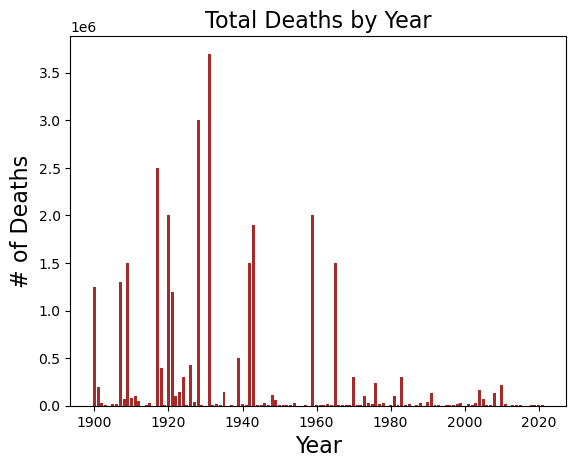

In [9]:
year=disasters_df['Year']
deaths = disasters_df['Total Deaths']
plt.bar(year, deaths, color='brown')
plt.title(f"Total Deaths by Year",fontsize = 16)
plt.xlabel("Year",fontsize = 16)
plt.ylabel("# of Deaths",fontsize = 16)


plt.savefig("Deaths_per_Year.png")

plt.show()

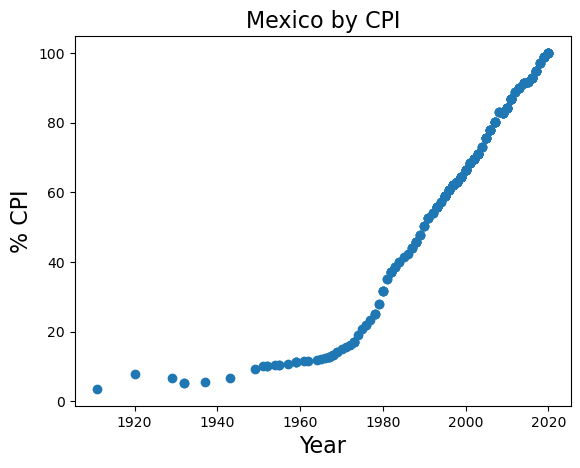

In [11]:
mexico_data=disasters_df.set_index('Country').loc['Mexico']
plt.title(f"Mexico by CPI",fontsize = 16)
plt.xlabel("Year",fontsize = 16)
plt.ylabel("% CPI",fontsize = 16)
plt.scatter(mexico_data['Year'],mexico_data['CPI'])
plt.savefig("Mexico_by_CPI.png")
plt.show()

In [7]:
endpoint = f'https://global-warming.org/api/ocean-warming-api'
endpoint

'https://global-warming.org/api/ocean-warming-api'

In [8]:
response = requests.get(endpoint).json()
response

{'error': None,
 'result': {'1880': '-0.02',
  '1881': '0.04',
  '1882': '0.03',
  '1883': '-0.04',
  '1884': '-0.11',
  '1885': '-0.17',
  '1886': '-0.16',
  '1887': '-0.19',
  '1888': '-0.01',
  '1889': '0.00',
  '1890': '-0.24',
  '1891': '-0.09',
  '1892': '-0.13',
  '1893': '-0.19',
  '1894': '-0.21',
  '1895': '-0.10',
  '1896': '0.03',
  '1897': '-0.01',
  '1898': '-0.17',
  '1899': '-0.10',
  '1900': '-0.02',
  '1901': '-0.12',
  '1902': '-0.19',
  '1903': '-0.33',
  '1904': '-0.43',
  '1905': '-0.22',
  '1906': '-0.19',
  '1907': '-0.27',
  '1908': '-0.40',
  '1909': '-0.44',
  '1910': '-0.41',
  '1911': '-0.40',
  '1912': '-0.25',
  '1913': '-0.30',
  '1914': '-0.15',
  '1915': '-0.08',
  '1916': '-0.26',
  '1917': '-0.32',
  '1918': '-0.18',
  '1919': '-0.21',
  '1920': '-0.21',
  '1921': '-0.19',
  '1922': '-0.24',
  '1923': '-0.24',
  '1924': '-0.24',
  '1925': '-0.21',
  '1926': '-0.11',
  '1927': '-0.17',
  '1928': '-0.21',
  '1929': '-0.27',
  '1930': '-0.14',
  '1931':

In [9]:
df = pd.DataFrame(response)
df

,error,result,description
1880,None,-0.02,NaN
1881,None,0.04,NaN
1882,None,0.03,NaN
1883,None,-0.04,NaN
1884,None,-0.11,NaN
...,...,...,...
2022,None,0.67,NaN
title,None,NaN,"Global Ocean Temperature Anomalies, January-De..."
units,None,NaN,Degrees Celsius
base_period,None,NaN,1901-2000


In [10]:
df['result']

df1=df.drop(
    labels = ['1880','1881','1882','1883','1884','1885','1886','1887','1888','1889','1890','1891','1892','1893','1894','1895','1896','1897','1898','1899','2022','title','units','base_period','missing'],
    axis = 0,
    inplace = False
)
df_limpio=df1.drop(columns=["error", "description"])
df_limpio

,result
1900,-0.02
1901,-0.12
1902,-0.19
1903,-0.33
1904,-0.43
...,...
2017,0.69
2018,0.66
2019,0.74
2020,0.72


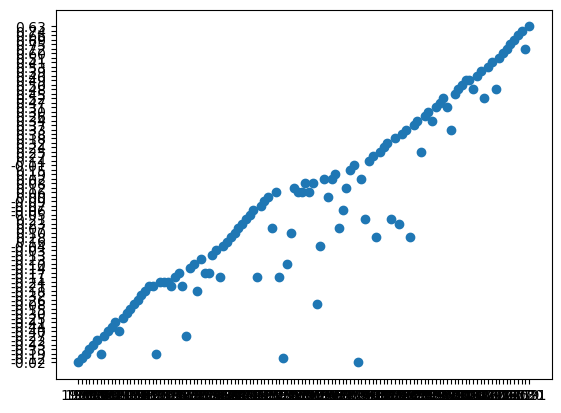

<Figure size 4000x2000 with 0 Axes>

In [11]:
x_valuess = df_limpio.index
y_valuess = df_limpio['result'].values
plt.scatter(x_valuess, y_valuess)
plt.figure(figsize=(40,20))
plt.show()

In [9]:
cleaned_data = disasters_df[disasters_df['Disaster Subgroup'] !='Extra-terrestrial']
cleaned_data

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages (000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,...,67980.0,NaN,67980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16122,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,South Africa,...,400.0,NaN,400.0,NaN,75000.0,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
16123,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,NaN,Meningitis,Congo (the Democratic Republic of the),...,NaN,NaN,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16124,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Serbia,...,22.0,NaN,22.0,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


C:\Users\pebya\AppData\Local\Temp\ipykernel_6596\673157320.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.int(label.get_text()) % 10 == 0:


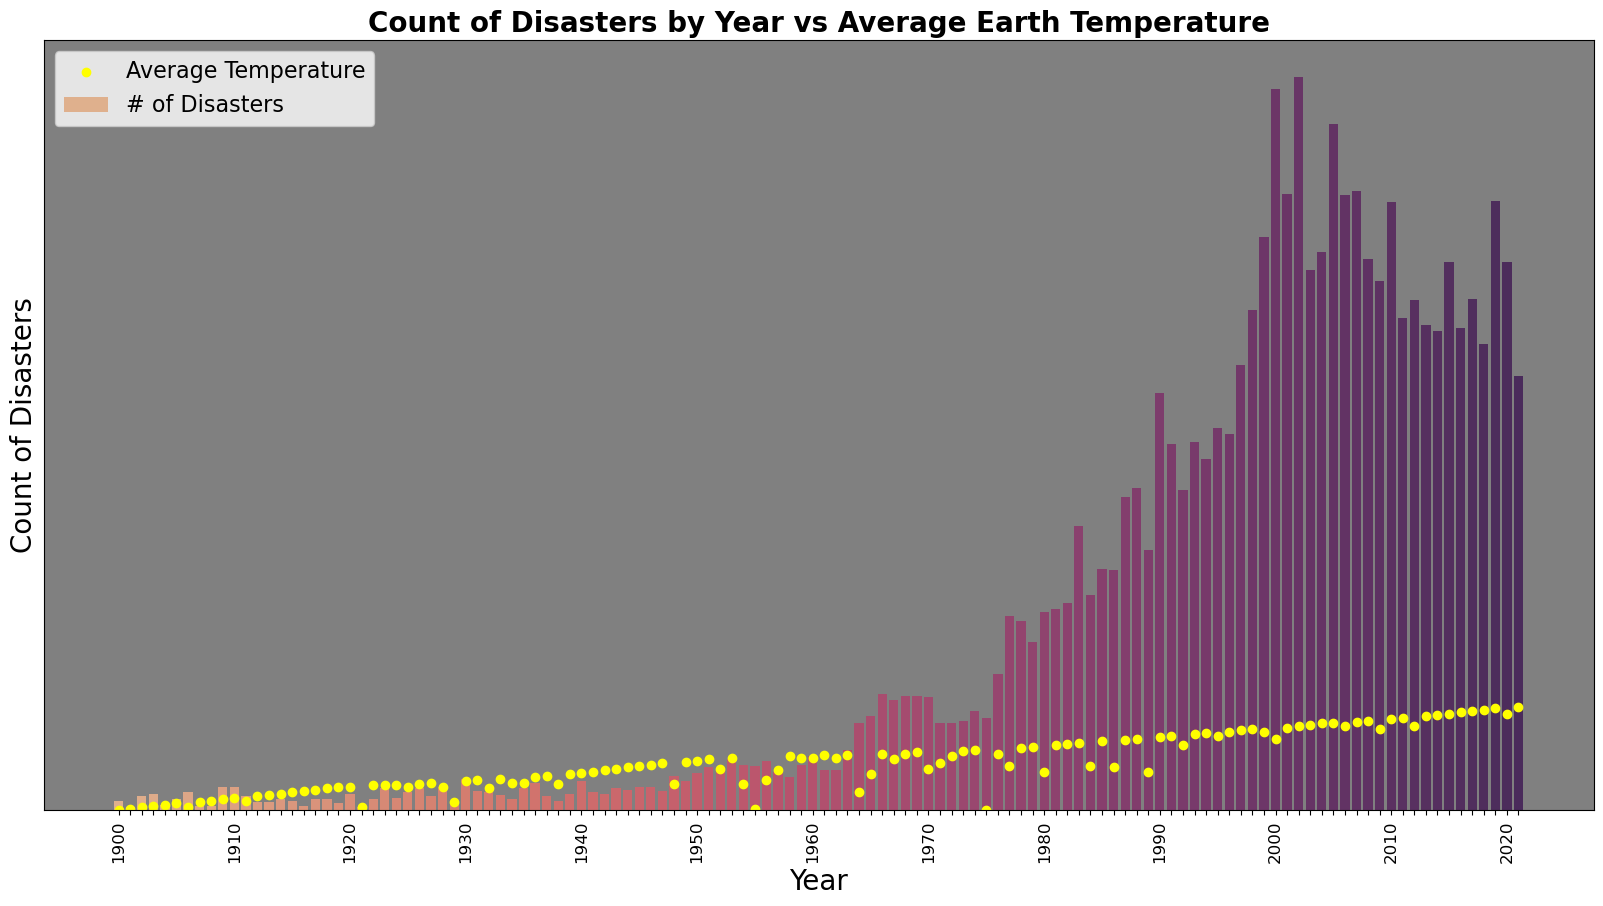

In [13]:
x_valuess = df_limpio.index
y_valuess = df_limpio['result'].values
nd_years = cleaned_data.loc[:,['Year', 'Disaster Subgroup']]
                              
plt.figure(figsize=(20,10))
ax = sns.countplot(data = cleaned_data,x='Year', palette = 'flare')
plt.xticks(rotation=90,fontsize = 12)
ax.grid()


for label in ax.get_xticklabels():
    if np.int(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

ax.set_xlabel('Year',fontsize = 20)
ax.set_ylabel('Count of Disasters',fontsize = 20)
plt.title('Count of Disasters by Year vs Average Earth Temperature', fontsize = 20,weight = 'bold');
x_valuess = df_limpio.index
y_valuess = df_limpio['result'].values
plt.tick_params(labelleft=False, left=False)
plt.scatter(x_valuess, y_valuess, color = 'yellow')
plt.legend(["Average Temperature" , "# of Disasters"],loc="upper left",fontsize = 16)
plt.grid(False)
ax.set(facecolor = "grey")

plt.savefig("Disasters_vs_Temperature.png")

plt.show()

